<a href="https://colab.research.google.com/github/YMMM98/Deep-learning/blob/main/HpCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving Uncleaned_Sheet1.csv to Uncleaned_Sheet1.csv


In [2]:
df = pd.read_csv("Uncleaned_Sheet1.csv")
df

,Date,Customer number,item,size bought
0,01-Jan-18,201317,Converse Chuck Taylor All Star Blue,38
1,01-Jan-18,212735,Converse Chuck Taylor All Star Blue,44
2,01-Jan-18,200484,Converse Chuck Taylor All Star Blue,40
3,01-Jan-18,209164,Converse Chuck Taylor All Star Blue,43
4,01-Jan-18,204910,Converse Chuck Taylor All Star Blue,44
...,...,...,...,...
9669,13-Oct-21,218293,Converse Chuck Taylor All Star Blue,37
9670,13-Oct-21,201779,Converse Chuck Taylor All Star Blue,38
9671,13-Oct-21,214184,Converse Chuck Taylor All Star Blue,37
9672,13-Oct-21,202902,Converse Chuck Taylor All Star Blue,37


In [3]:
rot = df
df.isnull().sum()


Date               0
Customer number    0
item               0
size bought        0
dtype: int64

In [4]:
df = df.drop("item",axis=1)
df = df.drop("Customer number", axis=1)
df['Date']=pd.to_datetime(df['Date']) #could've used parse_dates = True  in pd.read_csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9674 entries, 0 to 9673
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9674 non-null   datetime64[ns]
 1   size bought  9674 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 151.3 KB


# **I am trying to get a Time series of each size bought from 2018 to 2021**

In [5]:
import datetime as dt
df["Date"] = df["Date"].dt.strftime("%Y-%m")


In [6]:
df
df["sizes"] = df["size bought"] 
df = df.pivot_table(values="size bought",index="Date",columns="sizes", aggfunc= pd.Series.value_counts)
df

sizes,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
Date,,,,,,,,,,,,,,,,,,,,
2018-01,NaN,1.0,2.0,3.0,7.0,12.0,19.0,26.0,29.0,36.0,31.0,26.0,11.0,6.0,7.0,1.0,NaN,NaN,NaN,NaN
2018-02,NaN,NaN,NaN,2.0,8.0,11.0,13.0,20.0,28.0,33.0,29.0,23.0,13.0,4.0,6.0,5.0,NaN,1.0,NaN,NaN
2018-03,NaN,NaN,NaN,2.0,7.0,10.0,22.0,31.0,42.0,26.0,29.0,17.0,12.0,11.0,5.0,3.0,NaN,NaN,NaN,NaN
2018-04,NaN,1.0,2.0,5.0,2.0,5.0,17.0,20.0,36.0,26.0,38.0,29.0,17.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
2018-05,NaN,NaN,1.0,3.0,8.0,9.0,18.0,25.0,35.0,37.0,29.0,30.0,14.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN
2018-06,NaN,NaN,NaN,2.0,9.0,6.0,17.0,18.0,26.0,35.0,32.0,31.0,16.0,6.0,8.0,4.0,NaN,NaN,NaN,NaN
2018-07,1.0,NaN,1.0,2.0,6.0,10.0,18.0,30.0,24.0,36.0,31.0,23.0,19.0,12.0,3.0,1.0,NaN,NaN,NaN,NaN
2018-08,NaN,NaN,NaN,3.0,8.0,11.0,16.0,25.0,25.0,38.0,29.0,25.0,20.0,11.0,3.0,2.0,1.0,NaN,NaN,NaN
2018-09,NaN,NaN,NaN,1.0,14.0,10.0,24.0,25.0,37.0,28.0,22.0,18.0,18.0,6.0,4.0,2.0,1.0,NaN,NaN,NaN


In [7]:
dropped = df
dropped.to_csv('what.csv') 
dropped  = pd.read_csv("what.csv")
dropped = dropped.drop(["33","34","48","49","50","51","52"], axis=1)  #remove the pretty unpredictable shoe sizes
dropped = dropped.drop(index=45) #we remove the current month (2021-10) as it's not complete yet 
dropped =dropped.fillna(0)
dropped["Total"] = dropped.iloc[:,1:].sum(axis=1)
dropped.set_index("Date",inplace=True, drop= True)
dropped

,35,36,37,38,39,40,41,42,43,44,45,46,47,Total
Date,,,,,,,,,,,,,,
2018-01,2.0,3.0,7.0,12.0,19.0,26.0,29.0,36.0,31.0,26.0,11.0,6.0,7.0,215.0
2018-02,0.0,2.0,8.0,11.0,13.0,20.0,28.0,33.0,29.0,23.0,13.0,4.0,6.0,190.0
2018-03,0.0,2.0,7.0,10.0,22.0,31.0,42.0,26.0,29.0,17.0,12.0,11.0,5.0,214.0
2018-04,2.0,5.0,2.0,5.0,17.0,20.0,36.0,26.0,38.0,29.0,17.0,5.0,5.0,207.0
2018-05,1.0,3.0,8.0,9.0,18.0,25.0,35.0,37.0,29.0,30.0,14.0,3.0,4.0,216.0
2018-06,0.0,2.0,9.0,6.0,17.0,18.0,26.0,35.0,32.0,31.0,16.0,6.0,8.0,206.0
2018-07,1.0,2.0,6.0,10.0,18.0,30.0,24.0,36.0,31.0,23.0,19.0,12.0,3.0,215.0
2018-08,0.0,3.0,8.0,11.0,16.0,25.0,25.0,38.0,29.0,25.0,20.0,11.0,3.0,214.0
2018-09,0.0,1.0,14.0,10.0,24.0,25.0,37.0,28.0,22.0,18.0,18.0,6.0,4.0,207.0


In [8]:
dr = dropped
y2018 = pd.DataFrame(dr.loc["2018-01":"2018-12"].sum()).T
y2019 = pd.DataFrame(dr.loc["2019-01":"2019-12"].sum()).T
y2020 = pd.DataFrame(dr.loc["2020-01":"2020-12"].sum()).T
y2021 = pd.DataFrame(dr.loc["2021-01":"2021-09"].sum()).T
years = pd.concat([y2018,y2019,y2020,y2021])
years["year"] = [2018,2019,2020,2021]
years = years.set_index("year")

In [9]:
del years["Total"]
years

,35,36,37,38,39,40,41,42,43,44,45,46,47
year,,,,,,,,,,,,,
2018,11.0,33.0,89.0,119.0,199.0,310.0,375.0,388.0,365.0,286.0,193.0,91.0,61.0
2019,34.0,109.0,195.0,267.0,299.0,288.0,304.0,311.0,254.0,210.0,135.0,86.0,37.0
2020,65.0,207.0,403.0,570.0,440.0,302.0,172.0,118.0,103.0,63.0,45.0,36.0,11.0
2021,65.0,184.0,358.0,437.0,352.0,227.0,89.0,62.0,31.0,32.0,37.0,7.0,8.0


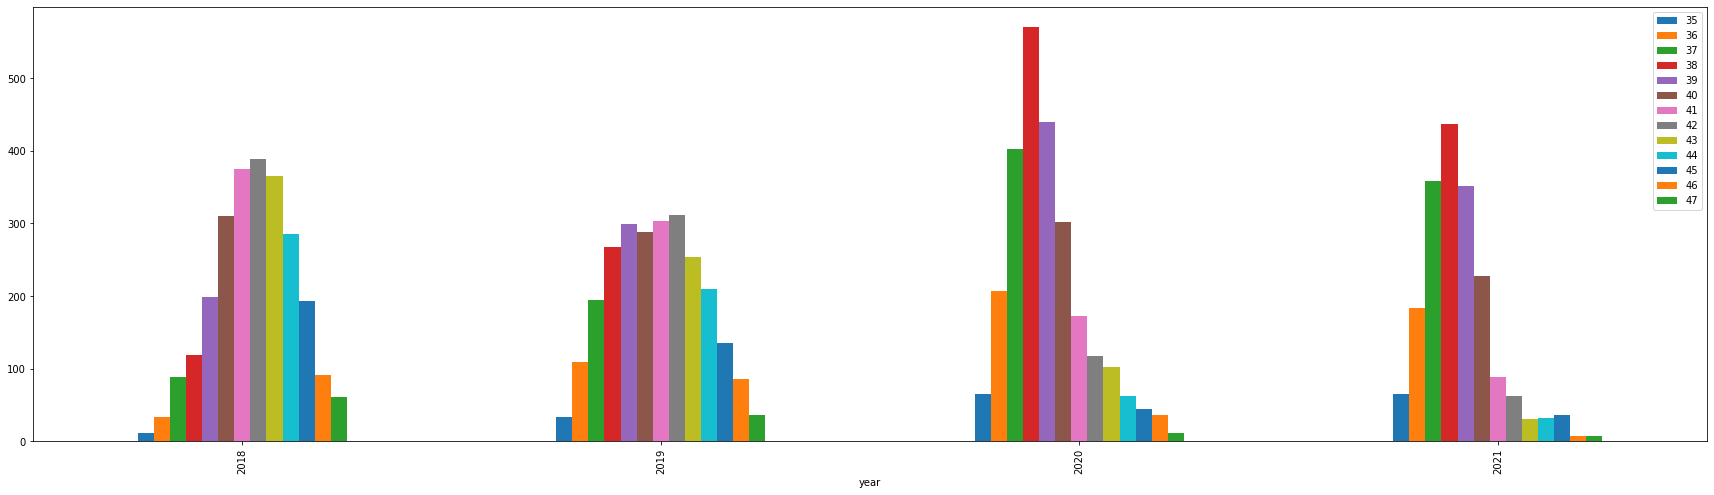

In [10]:
years.plot.bar(figsize=(30,8))

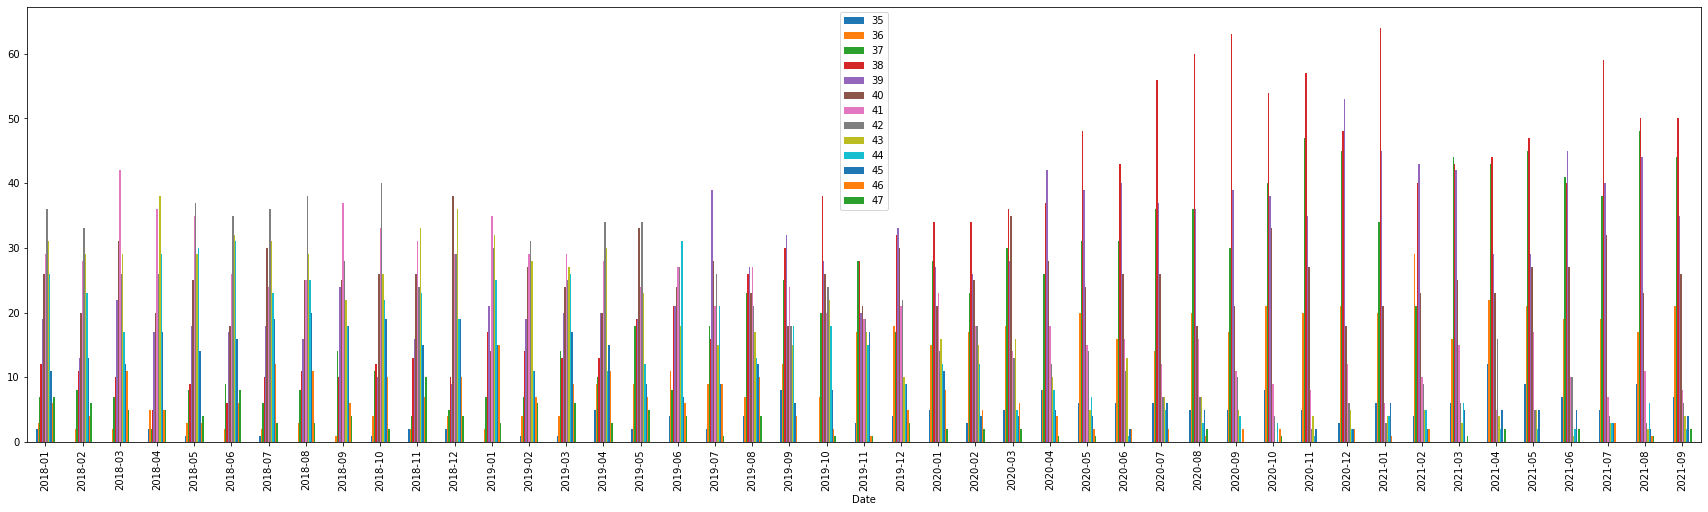

In [119]:
plpl = dr 
#del plpl["Total"]
dr.plot.bar(figsize=(30,8))

**We can clearly see a change in the distrubition. Over the years, smaller shoes are being bought more, which means there are new customers since people's feet don't shrink**



> The next plot shows it clearly




array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd886330e10>,
      dtype=object)

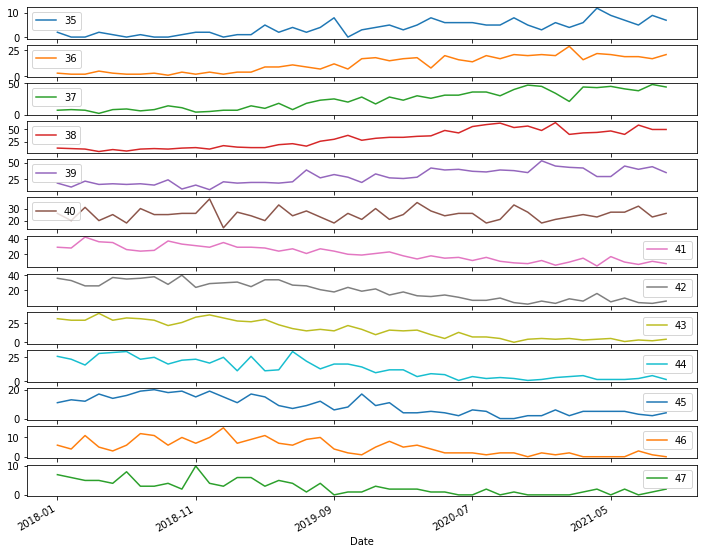

In [124]:
dr.plot(subplots=True, figsize=(12,10)) 

In [158]:
def data_to_train_and_test(size):
  train_df , test_df = dr[:"2021-02"] , dr["2021-02":]
  train_set = train_df[size].values
  test_set = test_df[size].values
  train_set = train_set.astype(int)
  test_set = test_set.astype(int)
  return train_set, test_set
#Function to split a size into training and testing set

In [167]:
allsizes = ["35","36","37","38","39","40","41","42","43","44","45","46","47"]
alltrains = []
alltests = []
#for string in allsizes:
train1 , test1 = data_to_train_and_test("35")
  #alltrains.append(train1)
  #alltests.append(test1)
train1

array([2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 5, 2, 4, 2, 4, 8, 0,
       3, 4, 5, 3, 5, 8, 6, 6, 6, 5, 5, 8, 5, 3, 6, 4])

In [165]:
def windowed_dataset(train1, i, batch_size):
  #alltests[i] = tf.data.Dataset.from_tensor_slices((alltests[i]))
  #alltests[i] = alltests[i].window(3,shift=1)
  train1 = tf.data.Dataset.from_tensor_slices((train1)) 
  train1 = train1.window(5, shift = 1, drop_remainder=True)
  train1 = train1.flat_map(lambda window: window.batch(5))
  train1 = train1.map(lambda window: (window[:-1], window[-1:]))
  train1 = train1.batch(batch_size).prefetch(1)
#train_dataset = train_dataset.batch(4)
#for x,y in alltrains[i]:
  #print(x.numpy(), y.numpy())

In [154]:
#col = 0
#windowed_dataset(alltests, alltrains, i= col,batch_size = 2)

In [166]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
#dataset = windowed_dataset(alltests, alltrains, i= col,batch_size = 2)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(alltrains[i], epochs=100, callbacks=[lr_schedule])

Epoch 1/100


ValueError: ignored